<hr/>
<h1><center> Data Modelling - Battombong</center></h1>
<hr/>

***

### Data Description

1. Date
2. Time 
3. Water Content (m3/m3)
4. Solar Radiation (W/m2)
5. Rain (mm)
6. Temperature (Celcuis)
7. RH (%)
8. Wind Speed (m/s)
9. Gust Speed (m/s)
10. Wind Direction (Degree)
11. Dew Point (Celcuis)

# Import Packages
***

In [1]:
# importing the required modules
import glob
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#important libraries for statistical 

from datetime import datetime, date 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# Read the Data
***

In [2]:
path = "../datasets/intermediate_layer/battombong"

data = pd.read_csv(path + "/cleaned_dataset_battombong.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,date,time,rain,rh,wind_speed,gust_speed,water_content,solar_radiation,temperature,dew_point,wind_direction
0,20/07/01,00:00:00,0.0,78.6,0.3,1.7,0.3542,1,27.51,23.48,247
1,20/07/01,00:15:00,0.0,81.2,0.0,0.0,0.3516,1,27.06,23.59,247
2,20/07/01,00:30:00,0.0,82.4,0.0,0.0,0.3496,1,26.92,23.69,247
3,20/07/01,00:45:00,0.0,81.6,0.3,1.0,0.3496,1,27.31,23.91,247
4,20/07/01,01:00:00,0.0,81.3,1.0,2.0,0.3537,1,27.41,23.95,237


# Data Quality Checking
***

In [3]:
#check the data missing 
data.isnull().any()

date               False
time               False
rain               False
rh                 False
wind_speed         False
gust_speed         False
water_content      False
solar_radiation    False
temperature        False
dew_point          False
wind_direction     False
dtype: bool

In [4]:
#sum it if it has any
data.isnull().sum()

date               0
time               0
rain               0
rh                 0
wind_speed         0
gust_speed         0
water_content      0
solar_radiation    0
temperature        0
dew_point          0
wind_direction     0
dtype: int64

In [5]:
#list all the columns which has in dataset 
for i,j in enumerate(data.columns):
    print(i, " ", j)

0   date
1   time
2   rain
3   rh
4   wind_speed
5   gust_speed
6   water_content
7   solar_radiation
8   temperature
9   dew_point
10   wind_direction


In [6]:
#check the number of columns and rows in dataframe
print("Number of rows in dataframe: ", data.shape[0])
print("**"*50)
print("Number of columns in dataframe: ", data.shape[1])

Number of rows in dataframe:  17078
****************************************************************************************************
Number of columns in dataframe:  11


In [7]:
#checking all datatype in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17078 entries, 0 to 17077
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             17078 non-null  object 
 1   time             17078 non-null  object 
 2   rain             17078 non-null  float64
 3   rh               17078 non-null  float64
 4   wind_speed       17078 non-null  float64
 5   gust_speed       17078 non-null  float64
 6   water_content    17078 non-null  float64
 7   solar_radiation  17078 non-null  int64  
 8   temperature      17078 non-null  float64
 9   dew_point        17078 non-null  float64
 10  wind_direction   17078 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 1.4+ MB


,rain,rh,wind_speed,gust_speed,water_content,solar_radiation,temperature,dew_point,wind_direction
rain,1.000000,0.074492,0.040985,0.099696,0.033218,-0.043876,-0.068806,-0.021385,0.007654
rh,0.074492,1.000000,-0.389753,-0.474487,-0.098759,-0.613104,-0.663239,0.117036,0.042838
wind_speed,0.040985,-0.389753,1.000000,0.920156,0.332022,0.199706,0.160146,-0.170653,-0.000416
gust_speed,0.099696,-0.474487,0.920156,1.000000,0.319728,0.295603,0.244379,-0.143039,-0.006482
water_content,0.033218,-0.098759,0.332022,0.319728,1.000000,0.086295,0.202044,0.165524,0.033698
solar_radiation,-0.043876,-0.613104,0.199706,0.295603,0.086295,1.000000,0.679733,0.289503,-0.050151
temperature,-0.068806,-0.663239,0.160146,0.244379,0.202044,0.679733,1.000000,0.662986,-0.122114
dew_point,-0.021385,0.117036,-0.170653,-0.143039,0.165524,0.289503,0.662986,1.000000,-0.121585
wind_direction,0.007654,0.042838,-0.000416,-0.006482,0.033698,-0.050151,-0.122114,-0.121585,1.000000


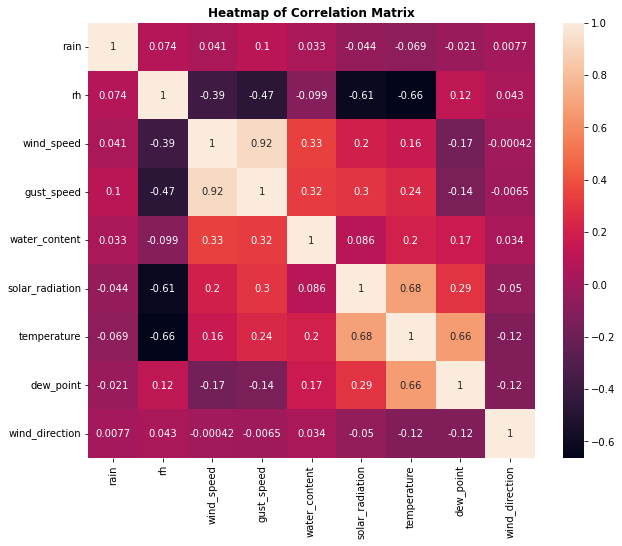

In [8]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?

plt.figure(figsize=(10,8))

correlation = data.corr()
correlation = (correlation)
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True)

plt.title('Heatmap of Correlation Matrix', fontweight='bold')
correlation

# Data Wrangling | Cleansing
***

In [9]:
#select only number features
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
numeric_features

['rain',
 'rh',
 'wind_speed',
 'gust_speed',
 'water_content',
 'solar_radiation',
 'temperature',
 'dew_point',
 'wind_direction']

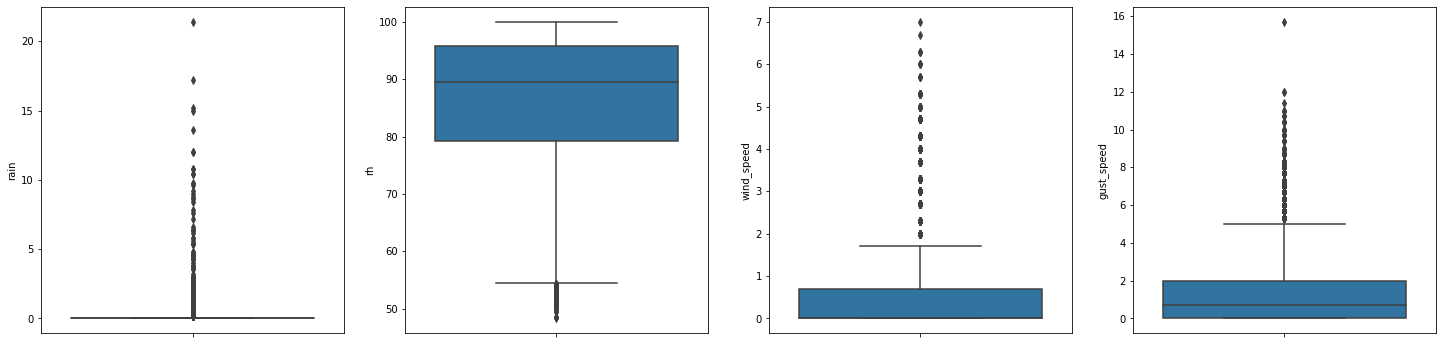

In [10]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['rain'], ax=axes[0])
sns.boxplot(y=data['rh'], ax=axes[1])
sns.boxplot(y=data['wind_speed'], ax=axes[2])
sns.boxplot(y=data['gust_speed'], ax=axes[3])

print()
plt.show()

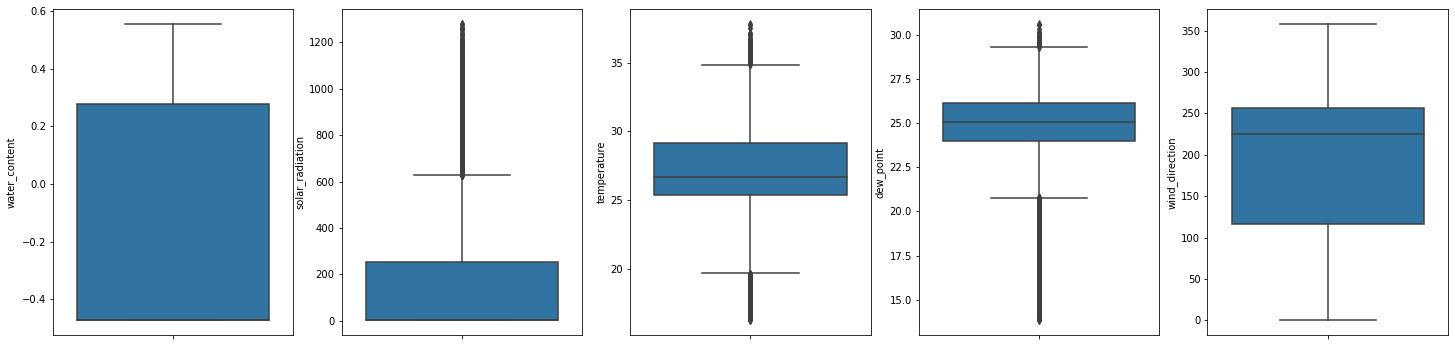

In [11]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['temperature'], ax=axes[2])
sns.boxplot(y=data['dew_point'], ax=axes[3])
sns.boxplot(y=data['wind_direction'], ax=axes[4])

print()
plt.show()

In [12]:
#remove outlier from dataset
from scipy.stats import zscore

#create two columns more of zscore value
data['water_content_zscore'] = zscore(data.water_content)
data['solar_radiation_zscore'] = zscore(data.solar_radiation)
data['rain_zscore'] = zscore(data.rain)
data['temperature_zscore'] = zscore(data.temperature)
data['rh_zscore'] = zscore(data.rh)
data['wind_speed_zscore'] = zscore(data.wind_speed)
data['gust_speed_zscore'] = zscore(data.gust_speed)
data['wind_direction_zscore'] = zscore(data.wind_direction)
data['dew_point_zscore'] = zscore(data.dew_point)

#define zscore.
#Z score is in (-3,3) value, if it's out means that it has outlier
data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)]
data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)]
data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)]
data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)]
data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)]
data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)]
data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)]
data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)]
data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)]

#drop z_score
data = data.drop(data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)].index)
data = data.drop(data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)].index)
data = data.drop(data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)].index)
data = data.drop(data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)].index)
data = data.drop(data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)].index)
data = data.drop(data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)].index)
data = data.drop(data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)].index)
data = data.drop(data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)].index)
data = data.drop(data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)].index)


<h3><center>After Removed Outlier</center></h3>

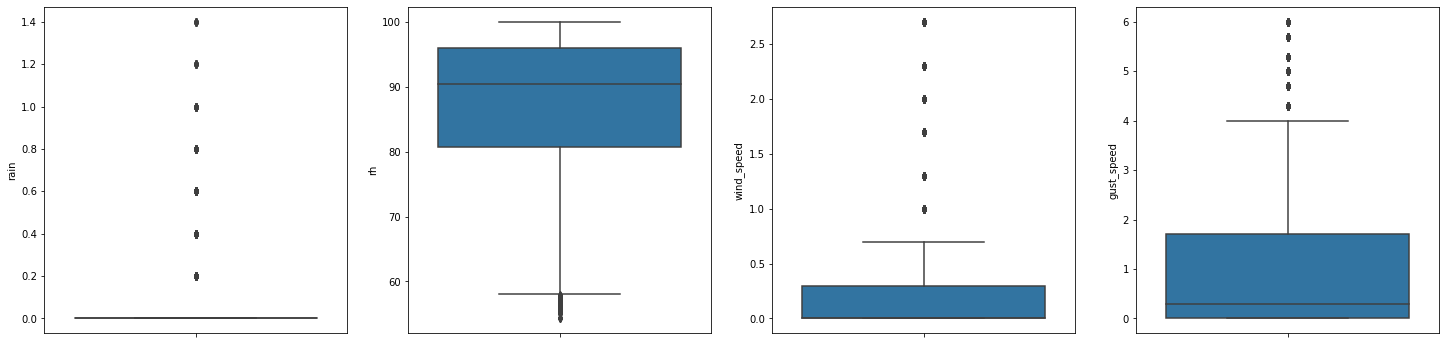

In [13]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['rain'], ax=axes[0])
sns.boxplot(y=data['rh'], ax=axes[1])
sns.boxplot(y=data['wind_speed'], ax=axes[2])
sns.boxplot(y=data['gust_speed'], ax=axes[3])

print()
plt.show()

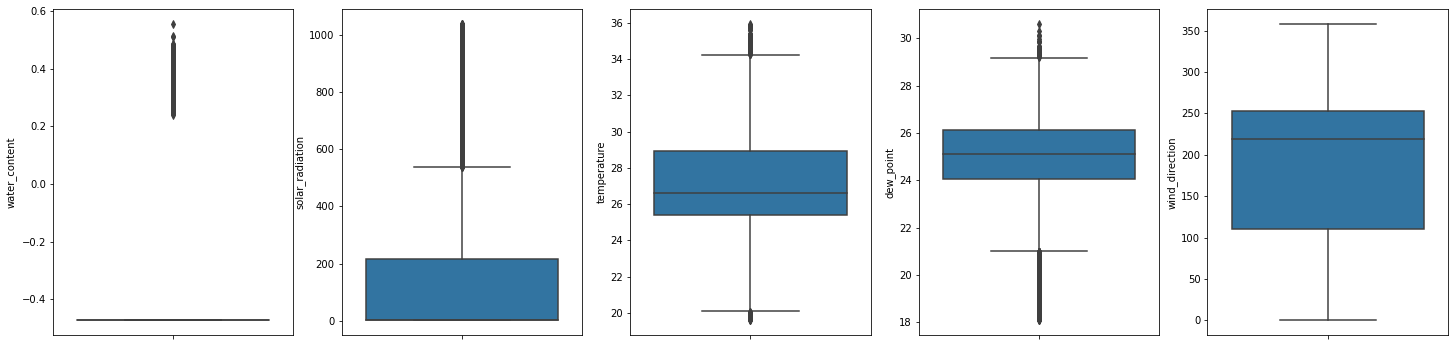

In [14]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['temperature'], ax=axes[2])
sns.boxplot(y=data['dew_point'], ax=axes[3])
sns.boxplot(y=data['wind_direction'], ax=axes[4])

print()
plt.show()

In [15]:
#I can see some of features are appear with negative values soo, we can apply this method to remove them out 
#for cols in numeric_features:
#    data = data[data[cols] > 0]

#select data frame only positive values 
data = data[data['water_content'] > 0]
data.shape

(3722, 20)

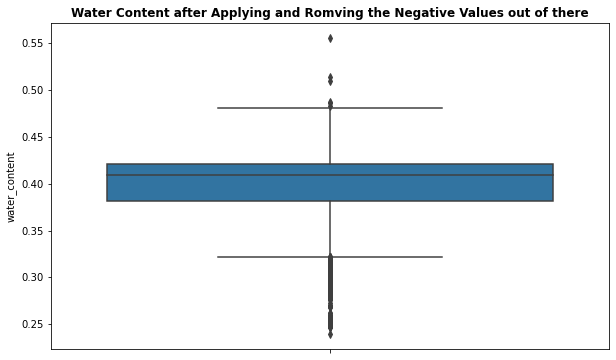

In [16]:
#Water Content after Applying and Romving the Negative Values out of there

sns.boxplot(y=data['water_content'])
plt.title("Water Content after Applying and Romving the Negative Values out of there", fontweight='bold')
plt.show()

In [17]:
#after removing z-score out, we should remove the feature name with z-score values too.

data.drop(['water_content_zscore',
          'water_content_zscore',
          'rain_zscore',
          'temperature_zscore',
          'rh_zscore',
          'wind_speed_zscore',
          'gust_speed_zscore',
          'wind_direction_zscore',
          'dew_point_zscore'], 
axis=1, inplace=True)
for i in data.columns:
    print(i)

date
time
rain
rh
wind_speed
gust_speed
water_content
solar_radiation
temperature
dew_point
wind_direction
solar_radiation_zscore


# Exploratory Data Analysis
***

In [18]:
#let's try with temperature values only first 
#select only date and temperature 

tem = data[['date', 'temperature']]
tem.tail()

,date,temperature
7160,20/08/16,27.83
7161,20/08/16,27.06
7162,20/08/16,27.06
7163,20/08/16,27.01
7164,20/08/16,26.67


In [19]:
#Parse strings to datetime type
tem['date'] = pd.to_datetime(tem['date'], yearfirst=True)
#set index from date 
#tem = tem.set_index(['date'])
#I'm going to consider the temperature just from 1900 until the end of 2012
#tem = tem.loc['2020-01-01':'2022-01-01']
#tem.head()

In [33]:
#let's sum and mean on daily temperature 
#tem = tem.append(tem.agg(['mean']).rename({'mean':'avg_daily_temperature'}))
  
tem = tem.groupby(['date'])['temperature'].mean()
tem = pd.DataFrame(tem)
tem.head()

,temperature
date,
2020-07-01,28.560000
2020-07-02,28.156226
2020-07-03,27.848788
2020-07-04,27.174932
2020-07-05,29.025843


In [34]:
#create a function for line plot 
def line_plot(x, y, title):
    plt.figure(figsize=(25,6))
    sns.lineplot(x=x, y=y)
    plt.title(title, fontweight='bold', fontsize=15)
    plt.show()

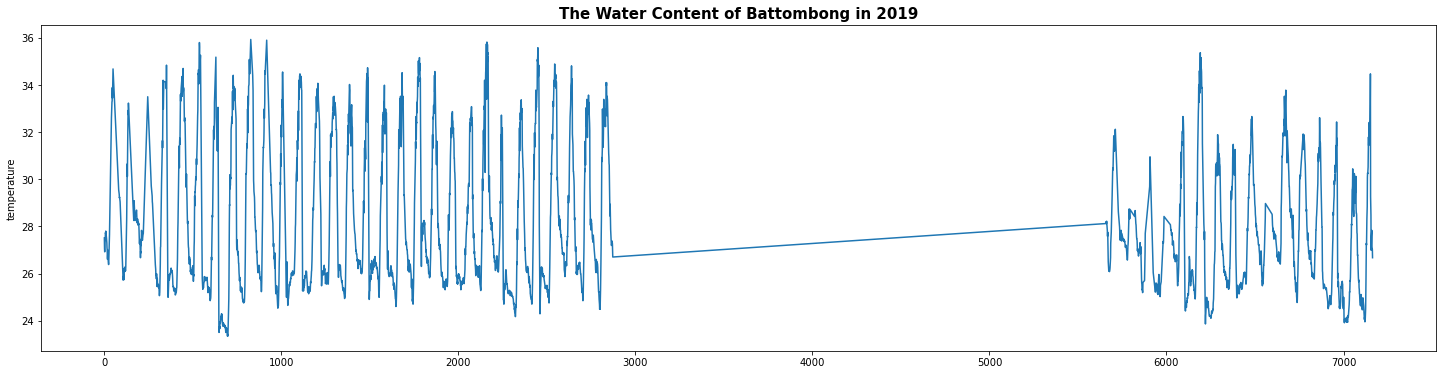

In [35]:
#draw a testing line plot
line_plot(data.date.index, data.temperature, "The Water Content of Battombong in 2019")

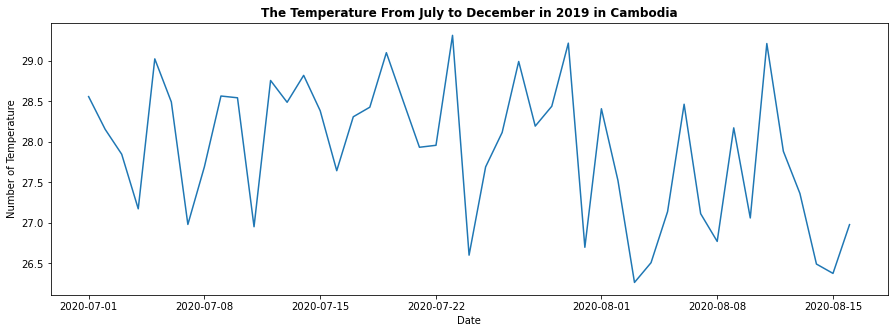

In [37]:
## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From July to December in 2019 in Cambodia', fontweight='bold')
plt.plot(tem)
plt.show()

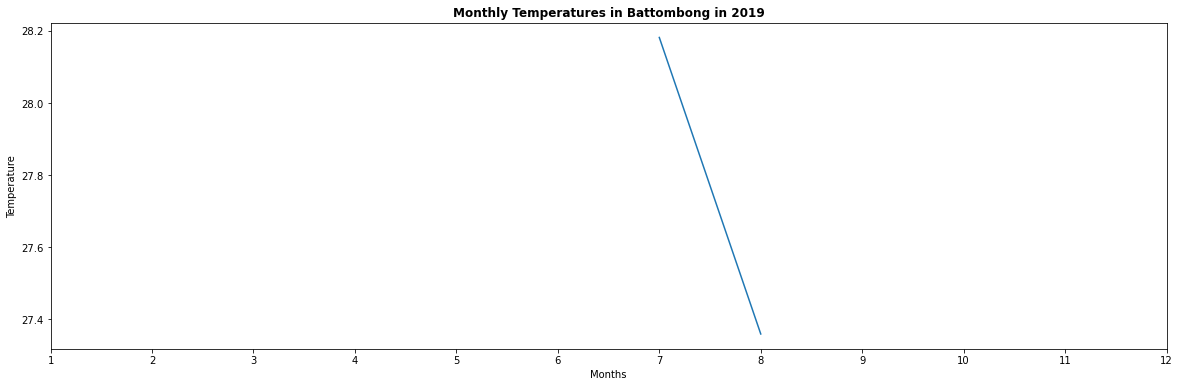

In [38]:
# we are going to create a pivot table to plot the monthly temperatures through the years

tem['month'] = tem.index.month
tem['year'] = tem.index.year
pivot = pd.pivot_table(tem, values='temperature', index='month', columns='year', aggfunc='mean')

monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Battombong in 2019', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

In [25]:
#drop the month and year out 
tem.drop(['month', 'year'], axis=1, inplace=True)

In [26]:
#Determine rolling statistics
rolmean = tem.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = tem.rolling(window=12).std()
print(rolmean,rolstd)

            temperature
date                   
2020-07-01          NaN
2020-07-02          NaN
2020-07-03          NaN
2020-07-04          NaN
2020-07-05          NaN
2020-07-06          NaN
2020-07-07          NaN
2020-07-08          NaN
2020-07-09          NaN
2020-07-10          NaN
2020-07-11          NaN
2020-07-12    28.063491
2020-07-13    28.057657
2020-07-14    28.113167
2020-07-15    28.157874
2020-07-16    28.197071
2020-07-17    28.137516
2020-07-18    28.132132
2020-07-19    28.308811
2020-07-20    28.377251
2020-07-21    28.324533
2020-07-22    28.275654
2020-07-23    28.472515
2020-07-24    28.292823
2020-07-25    28.226349
2020-07-26    28.167626
2020-07-27    28.218316
2020-07-28    28.264195
2020-07-29    28.275002
2020-07-30    28.340872
2020-07-31    28.140684
2020-08-01    28.131912
2020-08-02    28.097748
2020-08-03    27.956674
2020-08-04    27.722794
2020-08-05    27.767556
2020-08-06    27.832023
2020-08-07    27.748432
2020-08-08    27.563358
2020-08-09    27

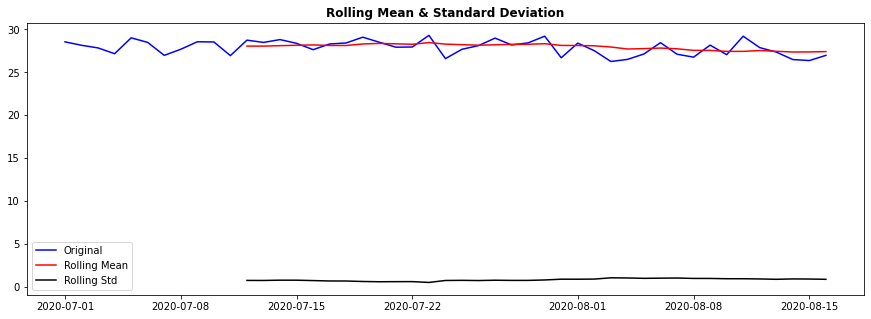

In [27]:
#Plot rolling statistics
plt.figure(figsize=(15,5))

orig = plt.plot(tem, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')

plt.title('Rolling Mean & Standard Deviation', fontweight='bold')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so. 

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [28]:
#Perform Augmented Dickey–Fuller test:

print('Results of Dickey Fuller Test:')
dftest = adfuller(data['temperature'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.251166e+01
p-value                        2.665989e-23
#Lags Used                     1.900000e+01
Number of Observations Used    3.702000e+03
Critical Value (1%)           -3.432118e+00
Critical Value (5%)           -2.862321e+00
Critical Value (10%)          -2.567186e+00
dtype: float64


For a Time series to be stationary, its ADCF test should have:
1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that **our Time Series at the moment is not stationary**

In [29]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Cambodia Temperature Variation', fontweight='bold')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

In [30]:
#build the function to test the stationarity 

def test_stationarity(timeseries):
    plt.figure(figsize=(15,5))
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(timeseries.iloc[:,0].values)
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

IndexError: index 47 is out of bounds for axis 0 with size 47

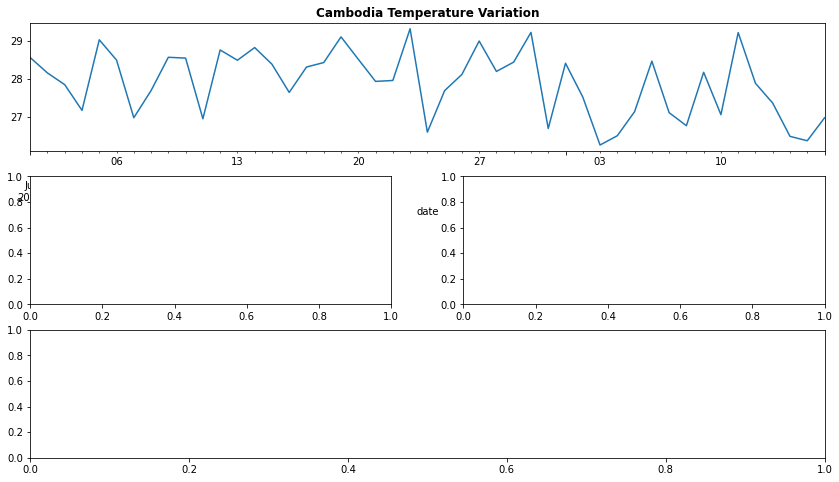

In [31]:
# The first approach is to check the series without any transformation
check_stationarity(tem['temperature'])

## Data Transformation to achieve Stationarity <a name="data-transform"></a>

There are a couple of ways to achieve stationarity through data transformation like taking $log_{10}$,$log_{e}$, square, square root, cube, cube root, exponential decay, time shift and so on ...

 lets start of with log transformations. Our objective is to remove the trend component. Hence,  flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

### Log Scale Transformation  <a name="log"></a>

In [ ]:
#Estimating trend
tem_logscale = np.log(tem)

## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From 2020 to 2022 in Cambodia', fontweight='bold')
plt.plot(tem_logscale)
plt.show()

In [ ]:
#The below transformation is required to make series stationary

plt.figure(figsize=(15,5))
movingAverage = tem_logscale.rolling(window=12).mean()
movingSTD = tem_logscale.rolling(window=12).std()
plt.title('The Temperature From 2020 to 2022 in Cambodia - Log Scale', fontweight='bold')
plt.plot(tem_logscale)
plt.plot(movingAverage, color='red')
plt.show()

In [ ]:
datasetLogScaleMinusMovingAverage = tem_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

In [ ]:
#let's implement it 
test_stationarity(datasetLogScaleMinusMovingAverage)

In [ ]:
# The first approach is to check the series without any transformation
check_stationarity(tem_logscale['temperature'])